In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/df_IEX_new.csv', index_col=0) 
data.head()

,Date,N1
S.No,,
0,01-07-2022 0.15,5229.52
1,01-07-2022 0.30,5229.35
2,01-07-2022 0.45,5229.32
3,01-07-2022 1.00,5000.88
4,01-07-2022 1.15,5000.45


In [ ]:
# examine shape of dataframe, variable types
print(data.shape)
print(data.dtypes) 

(1056, 2)
Date     object
N1      float64
dtype: object


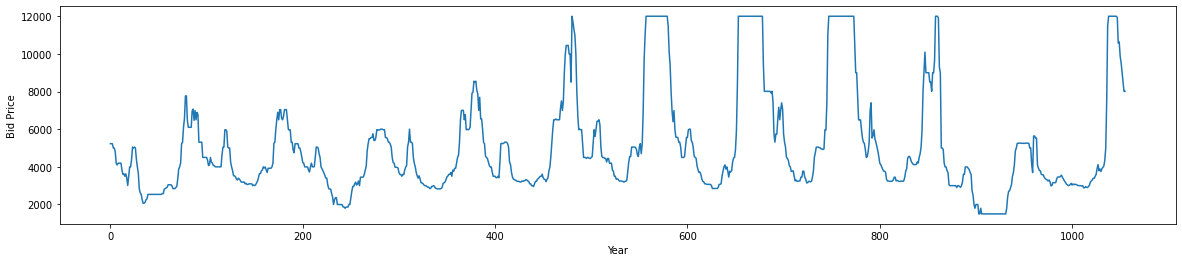

In [ ]:
# plot car count over all years
plt.figure(figsize=(20,4))
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Bid Price')
plt.plot(data.index, data['N1']);

                              ARMA Model Results                              
Dep. Variable:                     N1   No. Observations:                 1056
Model:                     ARMA(1, 0)   Log Likelihood               -8031.461
Method:                       css-mle   S.D. of innovations            485.404
Date:                Tue, 12 Jul 2022   AIC                          16068.922
Time:                        09:47:04   BIC                          16083.809
Sample:                             0   HQIC                         16074.565
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5256.9726    880.596      5.970      0.000    3531.037    6982.908
ar.L1.N1       0.9839      0.005    186.060      0.000       0.974       0.994
                                    Roots           

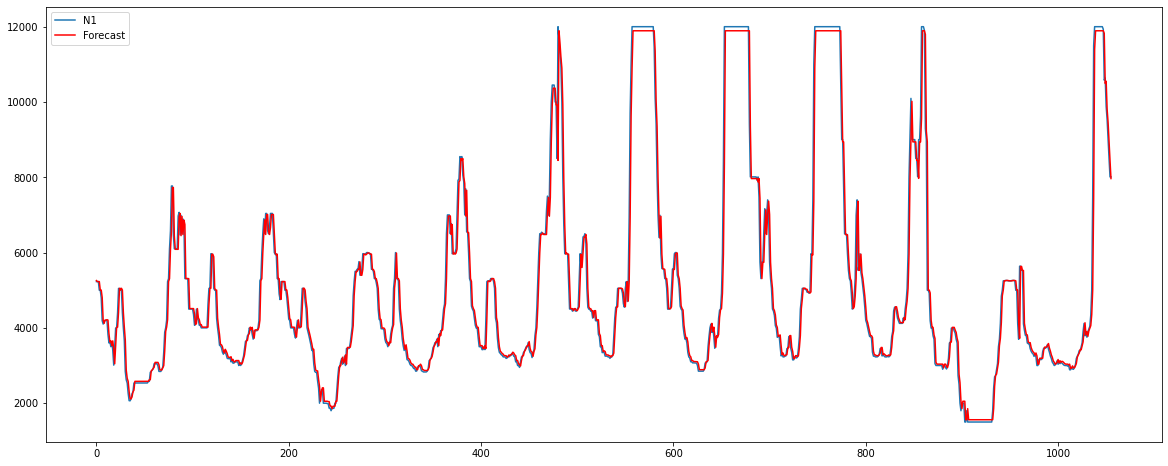

In [ ]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data['N1'], order=(1,0,0)) 
ax = plt.gca()
results = model.fit() 
plt.plot(data['N1'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['N1', 'Forecast'])

print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                     N1   No. Observations:                 1056
Model:                     ARMA(1, 1)   Log Likelihood               -7974.288
Method:                       css-mle   S.D. of innovations            459.777
Date:                Tue, 12 Jul 2022   AIC                          15956.577
Time:                        09:48:50   BIC                          15976.425
Sample:                             0   HQIC                         15964.101
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5203.2145    737.607      7.054      0.000    3757.532    6648.897
ar.L1.N1       0.9760      0.007    147.959      0.000       0.963       0.989
ma.L1.N1       0.2969      0.027     11.139      0.0

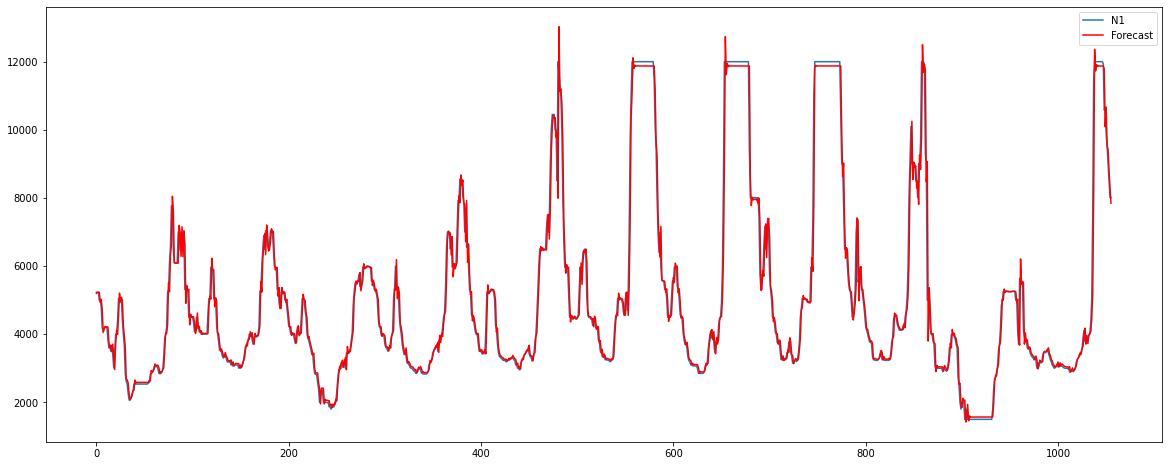

In [ ]:
# fit ARIMA model
fig = plt.figure(figsize=(20,8))
model = ARIMA(data['N1'], order=(1,0,1)) 
ax = plt.gca()
results = model.fit() 
plt.plot(data['N1'])
plt.plot(results.fittedvalues, color='red')
ax.legend(['N1', 'Forecast'])

print(results.summary())

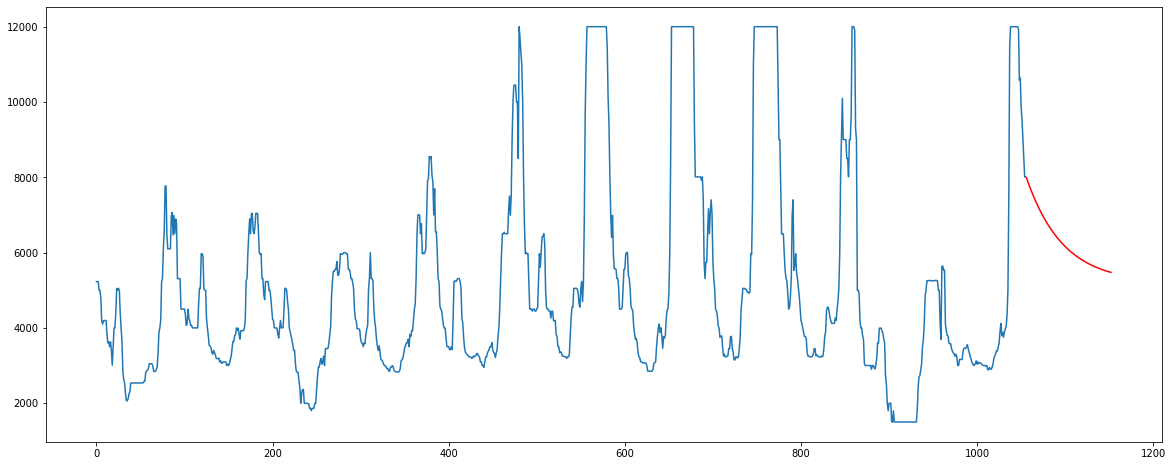

In [ ]:
# forecast quick and dirty
# TODO: clean this up
fig = plt.figure(figsize=(20,8))
num_points = len(data['N1'])
x = results.predict(start=(1056), end=(1152), dynamic=False)

plt.plot(data['N1'][:1056])
plt.plot(x, color='r')

In [ ]:
prections = pd.DataFrame(x)